In [1]:
import toml
from cabm_agent import ConsumerModel
from cabm_function_library.joint_calendar import generate_joint_ad_promo_schedule
from cabm_function_library.ad_helpers import generate_brand_ad_channel_map

In [2]:
config = toml.load("config.toml")

In [3]:
model = ConsumerModel(1000, enable_ads=False)

/Users/michael/Documents/GitHub/consumer-abm/cabm_agent.py:67: UserWarning: Beta Sampler Override is in effect.
  warnings.warn("Beta Sampler Override is in effect.")


In [4]:
for i in range(110):
    model.step()

In [5]:
model_df = model.datacollector.get_model_vars_dataframe()

In [6]:
model_df

,Total_Purchases,Average_Product_Price,Week_Number
0,"{'A': 0, 'B': 0}",5.00,1
1,"{'A': 338, 'B': 139}",2.50,2
2,"{'A': 746, 'B': 234}",2.50,3
3,"{'A': 736, 'B': 240}",2.50,4
4,"{'A': 785, 'B': 240}",3.75,5
...,...,...,...
105,"{'A': 754, 'B': 233}",2.50,2
106,"{'A': 745, 'B': 243}",2.50,3
107,"{'A': 758, 'B': 242}",2.50,4
108,"{'A': 738, 'B': 237}",3.75,5


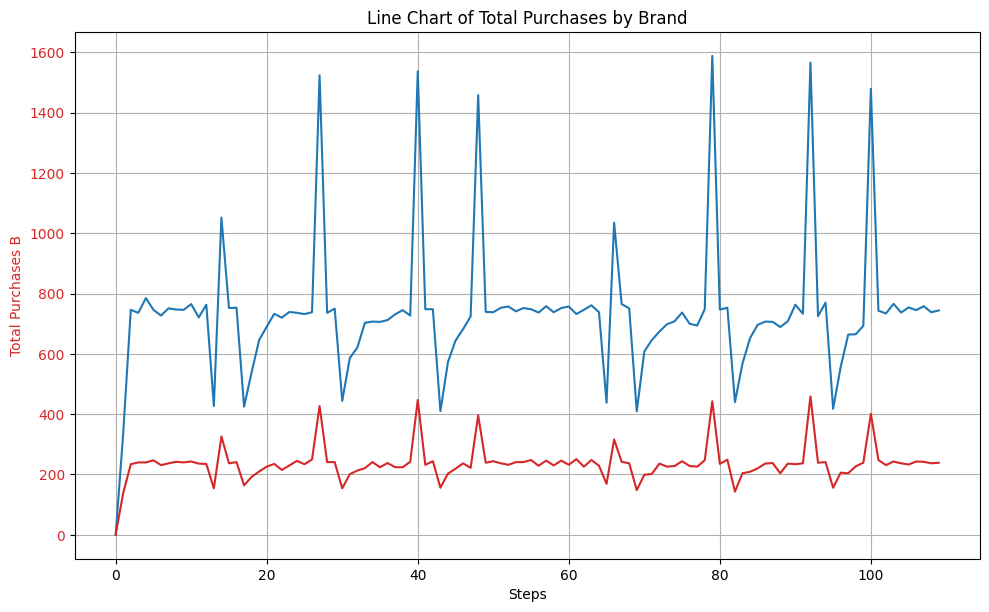

In [20]:
import matplotlib.pyplot as plt

# Extract purchases by brand
model_df['Total_Purchases_A'] = model_df['Total_Purchases'].apply(lambda x: x['A'])
model_df['Total_Purchases_B'] = model_df['Total_Purchases'].apply(lambda x: x['B'])

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot total purchases for brand A
color = 'tab:blue'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Total Purchases A', color=color)
ax1.plot(model_df['Total_Purchases_A'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot total purchases for brand B on the same axis
color = 'tab:red'
ax1.set_ylabel('Total Purchases B', color=color)
ax1.plot(model_df['Total_Purchases_B'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Line Chart of Total Purchases by Brand')
plt.grid(True)
plt.show()

In [8]:
agent_summary_df = model.datacollector.get_agent_vars_dataframe()

In [9]:
agent_summary_df

Household_Size Purchased_This_Step  Pantry_Stock  Pantry_Max  \
Step AgentID                                                                 
0    0                     4    {'A': 0, 'B': 0}      5.000000           5   
     1                     1    {'A': 0, 'B': 0}      2.000000           2   
     2                     3    {'A': 0, 'B': 0}      4.000000           4   
     3                     3    {'A': 0, 'B': 0}      4.000000           4   
     4                     1    {'A': 0, 'B': 0}      1.000000           1   
...                      ...                 ...           ...         ...   
109  995                   2    {'A': 0, 'B': 1}      2.473578           3   
     996                   2    {'A': 1, 'B': 0}      1.791480           2   
     997                   4    {'A': 0, 'B': 1}      3.546927           4   
     998                   1    {'A': 0, 'B': 0}      0.072106           1   
     999                   5    {'A': 1, 'B': 0}      5.232249           6   

              Pantry_Min Purchase_Behavior  Minimum_Purchase_Needed  \
Step AgentID                                                          
0    0               0.4       buy_minimum                        0   
     1               0.1       buy_minimum                        0   
     2               0.3       buy_minimum                        0   
     3               0.3       buy_minimum                        0   
     4               0.1       buy_minimum                        0   
...                  ...               ...                      ...   
109  995             0.2       buy_maximum                        0   
     996             0.2       buy_maximum                        0   
     997             0.4       buy_maximum                        0   
     998             0.1       buy_maximum                        1   
     999             0.5       buy_maximum                        0   

              Current_Product_Price  Last_Product_Price Brand_Preference  
Step AgentID                                                              
0    0                         5.00                 5.0                A  
     1                         5.00                 5.0                A  
     2                         5.00                 5.0                A  
     3                         5.00                 5.0                A  
     4                         5.00                 5.0                B  
...                             ...                 ...              ...  
109  995                       3.75                 5.0                B  
     996                       3.75                 5.0                A  
     997                       3.75                 5.0                B  
     998                       3.75                 5.0                A  
     999                       3.75                 5.0                A  

[110000 rows x 10 columns]

In [10]:
import matplotlib.pyplot as plt

def plot_purchases(agent_summary_df, AgentID):
    # Filter dataframe for the given AgentID
    agent_df = agent_summary_df.xs(AgentID, level='AgentID')

    # Extract purchases by brand
    agent_df['Purchased_This_Step_A'] = agent_df['Purchased_This_Step'].apply(lambda x: x['A'])
    agent_df['Purchased_This_Step_B'] = agent_df['Purchased_This_Step'].apply(lambda x: x['B'])

    fig, ax1 = plt.subplots(figsize=(10,6))

    # Plot purchases for brand A
    color = 'tab:blue'
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Purchases A', color=color)
    ax1.plot(agent_df['Purchased_This_Step_A'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    # Plot purchases for brand B
    color = 'tab:red'
    ax2.set_ylabel('Purchases B', color=color)
    ax2.plot(agent_df['Purchased_This_Step_B'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Line Chart of Purchases by Agent {AgentID}')
    plt.grid(True)
    plt.show()

/var/folders/vf/m4p5jj9s07x4v_df3mgg2fv40000gn/T/ipykernel_2831/1843756818.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Purchased_This_Step_A'] = agent_df['Purchased_This_Step'].apply(lambda x: x['A'])
/var/folders/vf/m4p5jj9s07x4v_df3mgg2fv40000gn/T/ipykernel_2831/1843756818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Purchased_This_Step_B'] = agent_df['Purchased_This_Step'].apply(lambda x: x['B'])


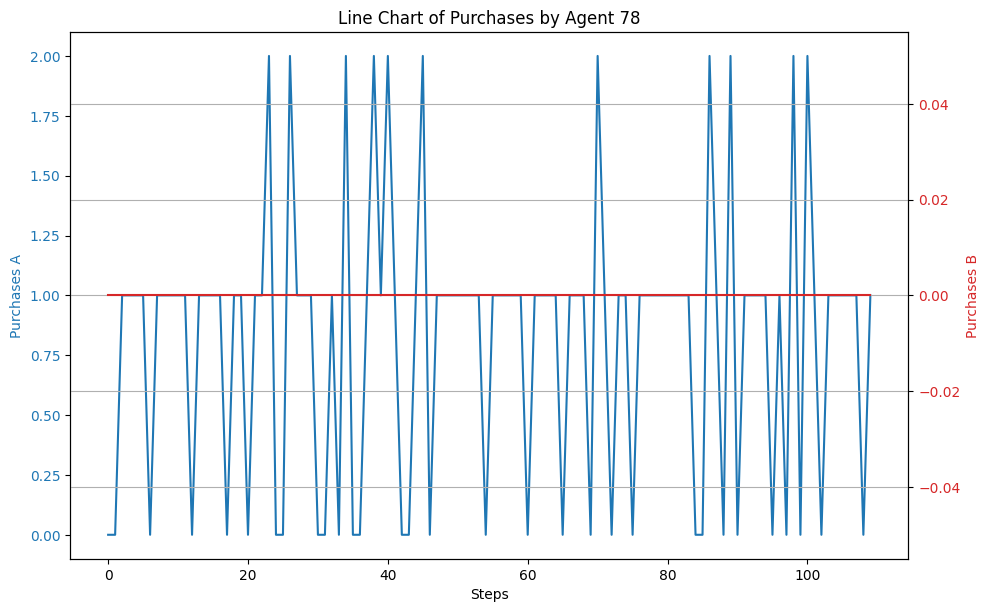

In [12]:
plot_purchases(agent_summary_df,78)

In [13]:
def check_multiple_purchases(df):
    # Define a function to check if more than one value in the dictionary is greater than 0
    def more_than_one_purchase(purchases):
        return sum(value > 0 for value in purchases.values()) > 1

    # Apply the function to the 'Purchased_This_Step' column
    multiple_purchases = df['Purchased_This_Step'].apply(more_than_one_purchase)

    # Return True if there are any cases of multiple purchases, False otherwise
    return any(multiple_purchases)

# Usage:
print(check_multiple_purchases(agent_summary_df))

False


In [14]:
def count_letter_changes(series):
    # Compute the difference between consecutive letters
    letter_changes = series != series.shift()

    # Ignore the first value
    letter_changes = letter_changes.iloc[1:]

    # Sum the letter_changes series to get the number of letter changes
    change_count = letter_changes.sum()

    return change_count

In [15]:
count_letter_changes(agent_summary_df.xs(5, level='AgentID')['Brand_Preference'])

0

In [16]:
agent_summary_df.index

MultiIndex([(  0,   0),
            (  0,   1),
            (  0,   2),
            (  0,   3),
            (  0,   4),
            (  0,   5),
            (  0,   6),
            (  0,   7),
            (  0,   8),
            (  0,   9),
            ...
            (109, 990),
            (109, 991),
            (109, 992),
            (109, 993),
            (109, 994),
            (109, 995),
            (109, 996),
            (109, 997),
            (109, 998),
            (109, 999)],
           names=['Step', 'AgentID'], length=110000)

In [17]:
agent_summary_df.xs(8, level='AgentID')['Brand_Preference'].values

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A'], dtype=object)

In [18]:
# Get all unique AgentIDs
unique_agent_ids = agent_summary_df.index.get_level_values('AgentID').unique()

# Loop over all AgentIDs and apply function
results = []
for agent_id in unique_agent_ids:
    agent_brand_pref = agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference']
    result = count_letter_changes(agent_brand_pref)
    results.append((agent_id, result))
    

In [19]:
for i in unique_agent_ids:
    print(agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference'].values)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A']
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A']
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A